# Computer Vision Masterclass - Face recognition

## OpenCV

### Loading the dataset

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject12.noglasses.gif', 'subject12.centerlight.gif', 'subject02.sleepy.gif', 'subject05.rightlight.gif', 'subject02.happy.gif', 'subject04.rightlight.gif', 'subject08.surprised.gif', 'subject06.wink.gif', 'subject10.glasses.gif', 'subject13.rightlight.gif', 'subject05.centerlight.gif', 'subject05.glasses.gif', 'subject09.noglasses.gif', 'subject12.sleepy.gif', 'subject06.normal.gif', 'subject07.surprised.gif', 'subject07.sad.gif', 'subject07.sleepy.gif', 'subject03.sleepy.gif', 'subject13.surprised.gif', 'subject04.wink.gif', 'subject11.normal.gif', 'subject09.wink.gif', 'subject12.sad.gif', 'subject06.noglasses.gif', 'subject09.happy.gif', 'subject06.centerlight.gif', 'subject05.sad.gif', 'subject09.centerlight.gif', 'subject09.leftlight.gif', 'subject05.happy.gif', 'subject09.surprised.gif', 'subject11.leftlight.gif', 'subject07.glasses.gif', 'subject14.rightlight.gif', 'subject14.wink.gif', 'subject15.wink.gif', 'subject11.centerlight.gif', 'subject11.wink.gif', 'subject12.wink.

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    image = Image.open(path).convert('L')
    #print(type(image))
    image_np = np.array(image, 'uint8')
    #print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
ids

array([12, 12,  2,  5,  2,  4,  8,  6, 10, 13,  5,  5,  9, 12,  6,  7,  7,
        7,  3, 13,  4, 11,  9, 12,  6,  9,  6,  5,  9,  9,  5,  9, 11,  7,
       14, 14, 15, 11, 11, 12, 10,  9, 11,  8,  8, 12,  2,  8, 13, 12,  3,
       10, 15,  8,  7, 12,  7,  1,  3, 10, 10,  1, 14,  5, 10,  6,  4,  5,
        8,  1,  8, 15,  9, 14, 14, 13,  2, 15,  4,  2, 12,  6,  1, 10, 11,
        1,  3,  1,  6, 10,  2, 15,  4, 13, 11,  6, 11, 15,  2,  3,  2, 11,
        3,  9,  1, 10,  1, 13, 15, 13,  3,  4,  7,  8, 14,  2,  5, 15,  5,
        4,  4,  1, 14,  4, 13,  6,  8, 13,  3,  7, 14,  7,  3, 15, 14])

In [ ]:
len(ids)

135

In [ ]:
len(faces)

135

In [ ]:
faces[0], faces[0].shape

(array([[130, 128, 108, ..., 253, 244, 255],
        [255, 255, 220, ..., 249, 243, 255],
        [246, 223, 232, ..., 252, 241, 255],
        ...,
        [249, 246, 255, ..., 160, 161, 163],
        [255, 252, 255, ..., 154, 159, 163],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

In [ ]:
243 * 320

77760

### Training the LBPH classifier

In [ ]:
8 * 8

64

In [ ]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors=14, grid_x = 9, grid_y = 9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognizing faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
test_image = '/content/yalefaces/test/subject10.sad.gif'

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
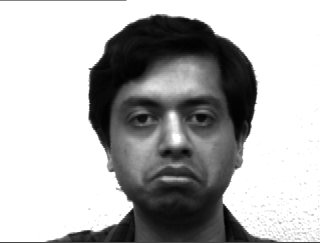

In [ ]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

In [ ]:
image_np.shape

(243, 320)

In [ ]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 36.84750735484425)

In [ ]:
prediction[0]

10

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

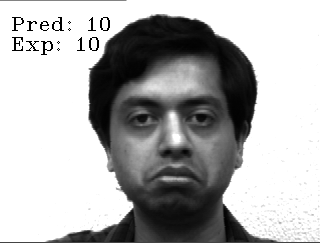

In [ ]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  #print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
type(predictions)

list

In [ ]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions

array([11, 12,  4,  3, 10, 14,  4,  7,  4, 12, 13,  9,  4, 14, 13, 12,  4,
       11,  4,  7,  7,  1,  9,  6,  5,  3,  5, 14, 15,  8])

In [ ]:
expected_outputs

array([11, 12,  4,  3, 10,  6,  8, 15,  1,  2, 13,  9,  2, 14, 13, 12,  4,
       11, 10,  9,  7,  1,  7,  6,  5,  3,  5, 14, 15,  8])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.7

In [ ]:
len(predictions)

30

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

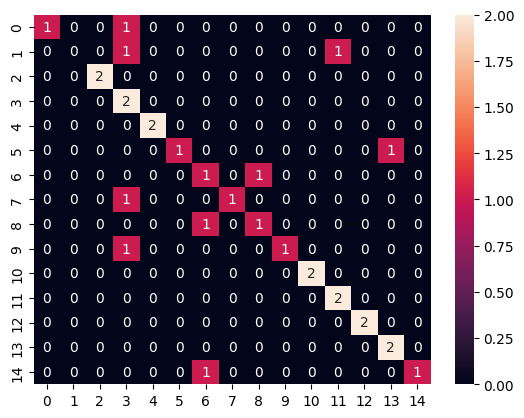

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

## Dlib

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

### Detecting facial points

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')

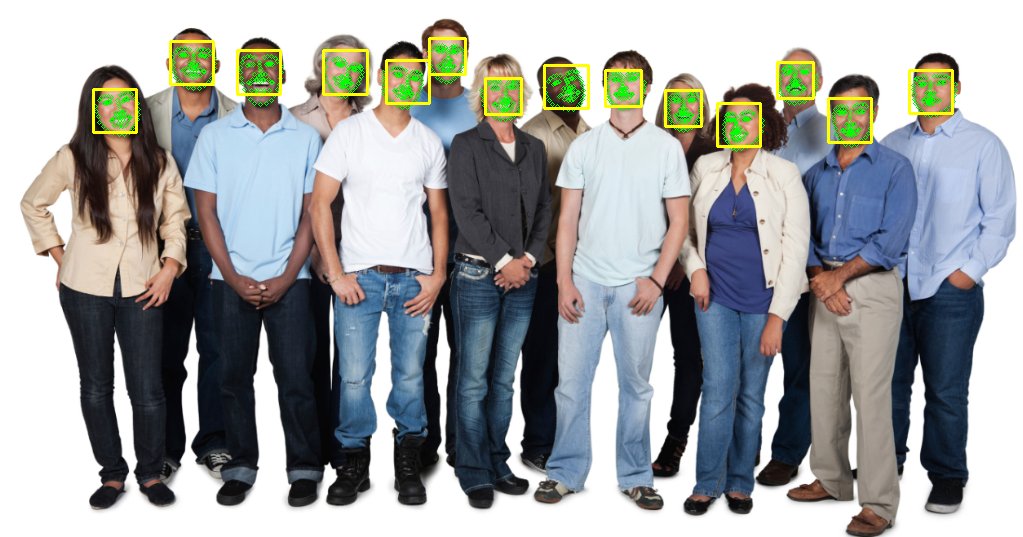

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Images/people2.jpg')
face_detection = face_detector(image, 1)
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1)

  #print(points.parts())
  #print(len(points.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(image)

### Detecting facial descriptors

In [ ]:
import os

In [ ]:
# Resnet: https://arxiv.org/abs/1512.03385
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path)
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    #print(type(face_descriptor))
    #print(len(face_descriptor))
    #print(face_descriptor)
    face_descriptor = [f for f in face_descriptor]
    #print(face_descriptor)
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    #print(face_descriptor)
    #print(face_descriptor.shape)
    face_descriptor = face_descriptor[np.newaxis, :]
    #print(face_descriptor.shape)
    #print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = path
    idx += 1
  #cv2_imshow(image_np)

RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpc5fSsY/sdists-v9/pypi/dlib/19.24.6/jbfG2YVY7UZenyF17OTMu/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.

In [ ]:
# Install dlib and face_recognition with force-reinstall to handle potential conflicts
!pip install --force-reinstall dlib==19.24.0
!pip install --force-reinstall face-recognition==1.3.0

# Re-import necessary libraries
import dlib
import cv2
import numpy as np
from PIL import Image
import os
from google.colab.patches import cv2_imshow
from google.colab import drive

# Remount Google Drive if needed
drive.mount('/content/drive')

# Reload the dlib models
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat')

# Rerun the code to extract face descriptors
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = path
    idx += 1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
  Running setup.py clean for dlib
Failed to build dlib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (dlib)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/.tmpc5fSsY/sdists-v9/pypi/dlib/19.24.6/jbfG2YVY7UZenyF17OTMu/src/dlib/cuda/cuda_utils.h:186. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.

In [ ]:
!pip install -q face_recognition



In [ ]:
import os
import face_recognition
import numpy as np

face_descriptors = None
index = {}
idx = 0

train_dir = '/content/yalefaces/train'
paths = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.lower().endswith(('.jpg', '.png'))]

for path in paths:
    image = face_recognition.load_image_file(path)

    # Detect face locations
    face_locations = face_recognition.face_locations(image)

    # If face found
    if face_locations:
        # Get face encodings (descriptors)
        encodings = face_recognition.face_encodings(image, face_locations)

        for encoding in encodings:
            encoding = np.array(encoding)[np.newaxis, :]  # Make it 2D

            if face_descriptors is None:
                face_descriptors = encoding
            else:
                face_descriptors = np.concatenate((face_descriptors, encoding), axis=0)

            index[idx] = path
            idx += 1

print("Total faces encoded:", len(index))


Total faces encoded: 0


In [ ]:
face_descriptors.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
face_descriptors

array([[-0.15960525,  0.12599684,  0.00484303, ..., -0.00930956,
         0.10940759,  0.08466733],
       [-0.17235538,  0.1136959 , -0.00270471, ..., -0.00223573,
         0.08059182,  0.01848489],
       [-0.09598458,  0.11094984,  0.07923432, ...,  0.01291297,
         0.0270884 ,  0.0446354 ],
       ...,
       [-0.18384661,  0.13202682,  0.01299733, ..., -0.06448225,
         0.04979356,  0.08680876],
       [-0.10693379,  0.07860171,  0.06942052, ...,  0.02387847,
         0.13355064,  0.04657558],
       [-0.17317142,  0.09850316,  0.05565149, ..., -0.00197635,
         0.13108063, -0.05130084]])

In [ ]:
len(index)

132

In [ ]:
index

{0: '/content/yalefaces/train/subject01.leftlight.gif',
 1: '/content/yalefaces/train/subject02.rightlight.gif',
 2: '/content/yalefaces/train/subject14.leftlight.gif',
 3: '/content/yalefaces/train/subject03.sleepy.gif',
 4: '/content/yalefaces/train/subject10.happy.gif',
 5: '/content/yalefaces/train/subject05.wink.gif',
 6: '/content/yalefaces/train/subject15.centerlight.gif',
 7: '/content/yalefaces/train/subject05.normal.gif',
 8: '/content/yalefaces/train/subject08.happy.gif',
 9: '/content/yalefaces/train/subject12.centerlight.gif',
 10: '/content/yalefaces/train/subject06.glasses.gif',
 11: '/content/yalefaces/train/subject08.noglasses.gif',
 12: '/content/yalefaces/train/subject08.wink.gif',
 13: '/content/yalefaces/train/subject08.leftlight.gif',
 14: '/content/yalefaces/train/subject04.rightlight.gif',
 15: '/content/yalefaces/train/subject14.noglasses.gif',
 16: '/content/yalefaces/train/subject05.happy.gif',
 17: '/content/yalefaces/train/subject11.surprised.gif',
 18: '/c

### Calculating the distance between faces

In [ ]:
face_descriptors[131]

array([-0.17317142,  0.09850316,  0.05565149, -0.05539175, -0.02879368,
       -0.05965046, -0.03995393, -0.1205795 ,  0.17951395, -0.10741367,
        0.27764791, -0.03938848, -0.17637134, -0.15631707, -0.02652284,
        0.19985315, -0.22547209, -0.12447178, -0.00685543,  0.00623288,
        0.12772107,  0.02508534,  0.0292584 ,  0.01277171, -0.14672461,
       -0.33570987, -0.11110422, -0.12610075,  0.00267787, -0.03639387,
       -0.05409677, -0.0691645 , -0.21351577, -0.0977193 ,  0.02578954,
        0.03174268, -0.03273258, -0.08004867,  0.18143469,  0.00674607,
       -0.20764434,  0.01678376,  0.06446838,  0.231958  ,  0.18343355,
        0.03515408,  0.02022972, -0.17999655,  0.13814643, -0.11280209,
       -0.00797377,  0.10111537,  0.08912264,  0.0417302 ,  0.03008556,
       -0.11800317,  0.00203966,  0.10468487, -0.13025069, -0.02265403,
        0.07056812, -0.04119729, -0.05078266, -0.08433526,  0.24512665,
        0.02995062, -0.14742534, -0.16225813,  0.12093908, -0.06

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm
np.linalg.norm(face_descriptors[131] - face_descriptors[131])

0.0

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[130])

0.5344403082166147

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[129])

0.8587304436869506

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[128])

0.3552135714020822

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1)

array([0.        , 0.61303464, 0.92288022, 0.74760518, 0.77574899,
       0.7256559 , 0.6005599 , 0.76507297, 0.72321722, 0.755784  ,
       0.71144602, 0.83499121, 0.75540925, 0.77202177, 0.82126634,
       0.78872834, 0.73652121, 0.68923726, 0.73981141, 0.70221009,
       0.66188494, 0.789562  , 0.72660225, 0.67318719, 0.66955663,
       0.69033051, 0.67425737, 0.67180415, 0.66188494, 0.76008592,
       0.75585428, 0.8035222 , 0.6097746 , 0.6536857 , 0.85051183,
       0.70381252, 0.6844868 , 0.84852837, 0.69321044, 0.80457581,
       0.8190316 , 0.85844537, 0.90026948, 0.73388507, 0.61291696,
       0.72397243, 0.78277004, 0.77812436, 0.81480589, 0.73356252,
       0.73548166, 0.67150277, 0.69385818, 0.69148257, 0.81351359,
       0.75534631, 0.72615904, 0.58430745, 0.78355887, 0.69630442,
       0.68340475, 0.69559183, 0.59398771, 0.68937392, 0.7600028 ,
       0.789562  , 0.75322076, 0.74375656, 0.70016745, 0.64089743,
       0.64421425, 0.85051183, 0.54212627, 0.72615904, 0.79778

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1))

91

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)[91]

0.5078407211009098

### Detecting faces with Dlib

In [ ]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = 'Not identified'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


  cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yalefaces/test'

In [ ]:
predictions

array([ 4,  5,  1,  8, 14,  6, 15, 13,  7, 10,  6, 12, 12,  9,  3,  2,  3,
        1, 14,  7, 11,  8, 10, 11, 15,  9, 13,  2,  5,  4])

In [ ]:
expected_outputs

array([ 4,  5,  1,  8, 14,  6, 15, 13,  7, 10,  6, 12, 12,  9,  3,  2,  3,
        1, 14,  7, 11,  8, 10, 11, 15,  9, 13,  2,  5,  4])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0

## Homework

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/MyDrive/sanika/sanika phots.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
# Import necessary libraries
from PIL import Image
import cv2
import numpy as np
import os # Import the os module
from google.colab.patches import cv2_imshow
from google.colab import drive

# Mount Google Drive if you haven't already
# drive.mount('/content/drive')

# Define the get_image_data function with necessary imports available
def get_image_data():
  paths = [os.path.join('/content/saniika', f) for f in os.listdir('/content/saniika')]
  faces = []
  ids = []
  for path in paths:
    # Check if the file is a regular file before attempting to open it
    if os.path.isfile(path):
        try:
            image = Image.open(path).convert('L')
            image_np = np.array(image, 'uint8')
            # Assuming the filename format is something like 'person.1.jpg' where '1' is the id
            filename = os.path.basename(path)
            # Split by '.' and then take the second element, then convert to int
            # Ensure splitting logic is correct based on your actual file naming
            # Example: 'person.1.jpg' -> splits to ['person', '1', 'jpg'] -> takes '1'
            # If filenames are 'sanika.1.jpg', the logic is correct.
            # If filenames are just '1.jpg', split('.')[0] might be needed.
            id = int(filename.split('.')[1])
            ids.append(id)
            faces.append(image_np)
        except (IndexError, ValueError) as e:
            print(f"Skipping file {filename}: Could not extract ID or convert to int. Error: {e}")
        except FileNotFoundError:
             print(f"Skipping file {path}: File not found.")
        except Exception as e:
            print(f"Skipping file {path}: An error occurred while processing the image. Error: {e}")


  return np.array(ids), faces

# Call the function
ids, faces = get_image_data()

# You can add print statements here to verify the output
# print(ids)
# print(len(faces))

In [ ]:
import os # Import the os module

def get_image_data():
  paths = [os.path.join('/content/saniika', f) for f in os.listdir('/content/saniika')]
  faces = []
  ids = []
  for path in paths:
    # Check if the file is a regular file before attempting to open it
    if os.path.isfile(path):
        image = Image.open(path).convert('L')
        image_np = np.array(image, 'uint8')
        # Assuming the filename format is something like 'person.1.jpg' where '1' is the id
        try:
            # Extract the id by splitting the filename and taking the second part
            filename = os.path.basename(path)
            # Split by '.' and then take the second element, then convert to int
            id = int(filename.split('.')[1])
            ids.append(id)
            faces.append(image_np)
        except (IndexError, ValueError) as e:
            print(f"Skipping file {filename}: Could not extract ID or convert to int. Error: {e}")


  return np.array(ids), faces

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/saniika', f) for f in os.listdir('/content/saniika')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])

    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
image = Image.open('/content/saniika/person.1.1.png')
image.size

(255, 260)

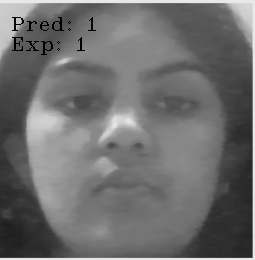

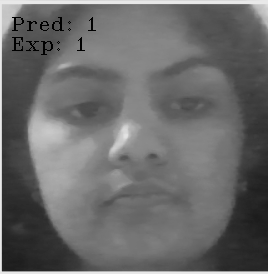

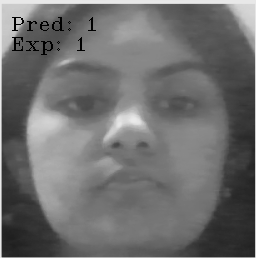

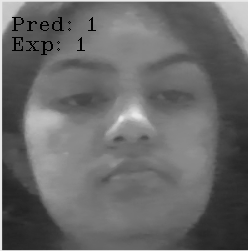

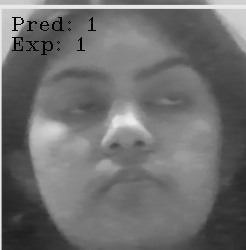

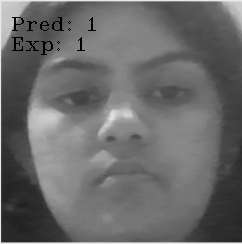

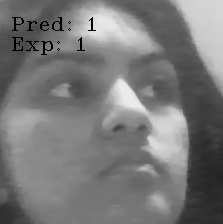

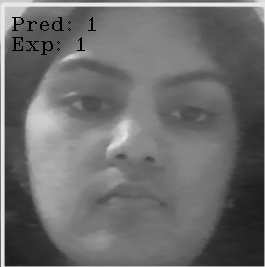

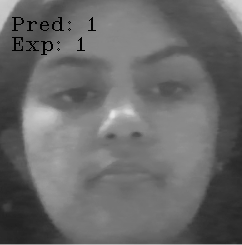

In [ ]:
paths = [os.path.join('/content/saniika', f) for f in os.listdir('/content/saniika')]
for path in paths:
  # Check if the current path is a file before proceeding
  if os.path.isfile(path):
    try:
      image = Image.open(path).convert('L')
      image_np = np.array(image, 'uint8')
      prediction, _ = lbph_face_classifier.predict(image_np)
      # Ensure the splitting logic for expected_output is robust
      # It assumes the filename format is 'something.ID.extension'
      # Adjust if your filenames have a different format
      filename = os.path.basename(path)
      parts = filename.split('.')
      if len(parts) > 1: # Ensure there's at least one dot to split
          expected_output = int(parts[1])
      else:
          print(f"Skipping file {filename}: Could not extract ID from filename.")
          continue # Skip to the next path if ID extraction fails


      cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
      cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
      cv2_imshow(image_np)
    except Exception as e:
        # Catch potential errors during image processing or prediction
        print(f"Error processing file {path}: {e}")

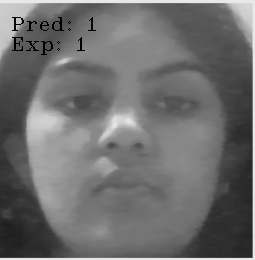

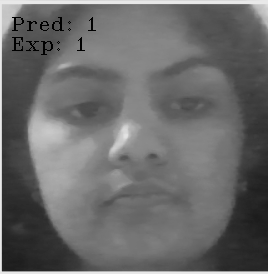

IsADirectoryError: [Errno 21] Is a directory: '/content/saniika/.ipynb_checkpoints'

In [ ]:
paths = [os.path.join('/content/saniika', f) for f in os.listdir('/content/saniika')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)